<a href="https://colab.research.google.com/github/smitjiwani/10zies/blob/main/rl7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Create Environment: Random Walk (states A to E, terminal at left and right ends)
n_states = 5
alpha = 0.01
gamma = 1.0
episodes = 100

# Features: One hot encoding for each state
def state_features(state):
  feature = np.zeros(n_states)
  if 0 < state < n_states +1:
    feature[state -1] = 1
  return feature

In [ ]:

# True value for plotting(from Sutton and Barto Textbook)
true_values = np.array([1/6,2/6,3/6,4/6,5/6])

# Inititalize weights for linear value function V(s) = w^T * x(s)
w = np.zeros(n_states)

# TD(0) with Function Approximation
for ep in range(episodes):
  state = 3 #start at center state (C)
  while True:
    next_state = state + np.random.choice([-1,1])
    reward = 1.0 if next_state == 6 else 0.0
    x = state_features(state)
    next_x = state_features(next_state)
    v = np.dot(w, x)
    next_v = np.dot(w, next_x) if 0 < next_state < 6 else 0
    td_error = reward + gamma * next_v - v
    w += alpha * td_error * x

    if next_state == 0 or next_state == 6:
      break
    state = next_state

In [ ]:
predicted_values = np.dot(w, np.eye(n_states))

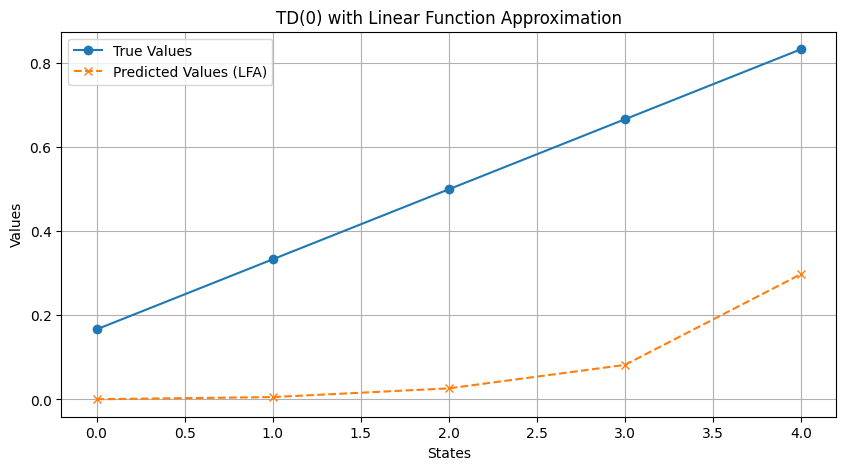

In [ ]:

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(true_values, label='True Values', marker='o', linestyle='-')
plt.plot(predicted_values, label='Predicted Values (LFA)', marker='x', linestyle='--')
plt.xlabel('States')
plt.ylabel('Values')
plt.title('TD(0) with Linear Function Approximation')
plt.legend()
plt.grid(True)
plt.show()